In [3]:
from keras.models import Sequential

In [4]:
from keras.datasets import imdb

In [5]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [6]:
#print shape of train_data and train_labels
print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
#For kicks
word_index = imdb.get_word_index()
reverse_word_index = dict((value,key) for (key,value) in word_index.items())
decode_review = ' '.join( [reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decode_review)
my_list = ['apple', 'banana', 'grapes', 'pear']
for c,value in enumerate(my_list):
    print(c,value)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [9]:
import numpy as np
def vectorize_sequence(data,dimension=10000):
    result = np.zeros((len(data),dimension))
    for i, value in enumerate(data):
        result[i,value]=1
    return result    

In [10]:
x_train = vectorize_sequence(train_data)
x_test  = vectorize_sequence(test_data)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [13]:
# compile stage
from keras import optimizers
from keras import losses
from keras import metrics
'''
This is multiple line commeting in Python
'''

#model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy',
#              metrics = ['accuracy'])

#Validation

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#learing 
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# fit - testing the model 


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



              

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 452us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 4s 250us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3087 - val_acc: 0.8712
Epoch 4/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2842 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3170 - val_acc: 0.8774
Epoch 7/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - 

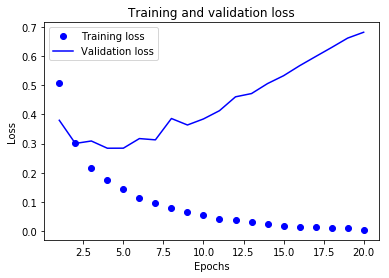

In [15]:
#plotting training and validation set loss

import matplotlib.pyplot as plt
#use history object in above cell - this object has history of training
history_dict = history.history
#print(len(history_dict['acc']))
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)

#plot
plt.plot(epochs, loss_value, 'bo', label='Training loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



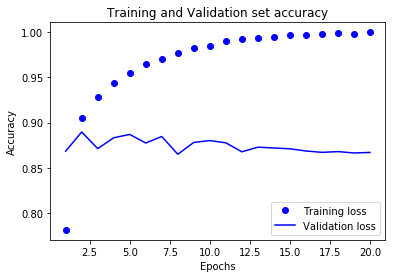

In [16]:
#Now plot accuracy
plt.clf()
acc_value = history_dict['acc']
val_acc_value= history_dict['val_acc']

plt.plot(epochs,acc_value,'bo',label='Training loss')
plt.plot(epochs,val_acc_value,'b',label='Validation loss')
plt.title('Training and Validation set accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#Model clearly overfit to the training data reduce the number of epochs and train the mode again
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 142us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 3s 132us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 4s 151us/step - loss: 0.1982 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 6s 226us/step


In [18]:
# make predictions
model.predict(x_test)

array([[0.138627  ],
       [0.99970204],
       [0.29618216],
       ...,
       [0.07151376],
       [0.04316371],
       [0.47817522]], dtype=float32)